In [134]:
import pandas as pd
pd.set_option('max_colwidth', None)


import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import bokeh
import holoviews as hv
from holoviews import opts

import nltk
from nltk.corpus import stopwords

import re
import unicodedata
import unidecode

import warnings
warnings.filterwarnings('ignore')

import os

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

# install and import necessary libraries.
import re, string, unicodedata                          # Import Regex, string and unicodedata.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt
import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prasana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Prasana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Prasana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [135]:
!pip install wordcloud matplotlib


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [136]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

In [137]:
read_df = pd.read_excel("Data+Set+-+industrial_safety_and_health_database_with_accidents_description.xlsx")


In [138]:
read_df = read_df.drop('Unnamed: 0', axis =1)

In [139]:
#Checking for 5 records
read_df.head(5)

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo."
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter."
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury."
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury."
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,"Approximately at 11:45 a.m. in circumstances that the mechanics Anthony (group leader), Eduardo and Eric Fernández-injured-the three of the Company IMPROMEC, performed the removal of the pulley of the motor of the pump 3015 in the ZAF of Marcy. 27 cm / Length: 33 cm / Weight: 70 kg), as it was locked proceed to heating the pulley to loosen it, it comes out and falls from a distance of 1.06 meters high and hits the instep of the right foot of the worker, causing the injury described."


In [140]:

# print hape of the df
print("The number of Records:",read_df.shape[0],"and number of features:",read_df.shape[1])

The number of Records: 425 and number of features: 10


In [26]:
read_df.describe(include="all")


,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
count,425,425,425,425,425,425,425,425,425,425
unique,287,3,12,3,5,6,2,3,33,411
top,2017-02-08 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others,"During the activity of chuteo of ore in hopper OP5; the operator of the locomotive parks his equipment under the hopper to fill the first car, it is at this moment that when it was blowing out to release the load, a mud flow suddenly appears with the presence of rock fragments; the personnel that was in the direction of the flow was covered with mud."
freq,6,251,90,241,316,143,403,189,232,3
first,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2017-07-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#Checking for the datatypes
read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Data                      425 non-null    datetime64[ns]
 1   Countries                 425 non-null    object        
 2   Local                     425 non-null    object        
 3   Industry Sector           425 non-null    object        
 4   Accident Level            425 non-null    object        
 5   Potential Accident Level  425 non-null    object        
 6   Genre                     425 non-null    object        
 7   Employee or Third Party   425 non-null    object        
 8   Critical Risk             425 non-null    object        
 9   Description               425 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 33.3+ KB


#STEP 2 - DATA CLEANSING 
#In this step of data cleansing, we are doing the following actions: 
Renaming Columns
Checking missing values
Removing duplicate observations
Convert data types

In [143]:


# Rename 'Data', 'Countries', 'Genre', 'Employee or Third Party' columns in Data frame
read_df.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee Type'}, inplace=True)

# Get the top 2 rows
read_df.head(5)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo."
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter."
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury."
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury."
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,"Approximately at 11:45 a.m. in circumstances that the mechanics Anthony (group leader), Eduardo and Eric Fernández-injured-the three of the Company IMPROMEC, performed the removal of the pulley of the motor of the pump 3015 in the ZAF of Marcy. 27 cm / Length: 33 cm / Weight: 70 kg), as it was locked proceed to heating the pulley to loosen it, it comes out and falls from a distance of 1.06 meters high and hits the instep of the right foot of the worker, causing the injury described."


In [144]:
#checking for missing values 
read_df_cols = read_df.columns.to_list()
read_df_cols


['Date',
 'Country',
 'Local',
 'Industry Sector',
 'Accident Level',
 'Potential Accident Level',
 'Gender',
 'Employee Type',
 'Critical Risk',
 'Description']

In [145]:
# get missing values
def get_missing_cols(read_df, cols):
    for col in cols:
        mss_perc = read_df[col].isnull().sum()/len(read_df[col])*100 
        print("missing perc for col",col, "is", "{:.6f}".format(mss_perc),"%") 

In [146]:
get_missing_cols(read_df, read_df_cols)


missing perc for col Date is 0.000000 %
missing perc for col Country is 0.000000 %
missing perc for col Local is 0.000000 %
missing perc for col Industry Sector is 0.000000 %
missing perc for col Accident Level is 0.000000 %
missing perc for col Potential Accident Level is 0.000000 %
missing perc for col Gender is 0.000000 %
missing perc for col Employee Type is 0.000000 %
missing perc for col Critical Risk is 0.000000 %
missing perc for col Description is 0.000000 %


In [147]:
#2. Check & Removing Duplicate Text

In [148]:
duplicated_rows = read_df[read_df.duplicated(keep="first")]


In [149]:
duplicated_rows


,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description
77,2016-04-01,Country_01,Local_01,Mining,I,V,Male,Third Party (Remote),Others,"In circumstances that two workers of the Abratech company were doing putty work inside the conditioning tank (5 meters deep and covered by platforms) of metal gratings - grating- in the upper part), two other employees of the HyT company carried out maneuvers transfer of a pump with the help of a manual tick - which worked hooked to a beam H, dragging the pump on the metal gratings (grating), suddenly the pump is hooked with a metal grate (grating) and when trying to release it, the metal grid (grating - 13.0 Kg. (60 cm x 92 cm)) falls inside the tank, hits a diagonal channel inside the tank and then impacts the right arm of one of the workers and rubs the helmet of the second worker that he was crouching. The area where the bomb was being moved was marked with tape and did not have a lookout."
262,2016-12-01,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,"During the activity of chuteo of ore in hopper OP5; the operator of the locomotive parks his equipment under the hopper to fill the first car, it is at this moment that when it was blowing out to release the load, a mud flow suddenly appears with the presence of rock fragments; the personnel that was in the direction of the flow was covered with mud."
303,2017-01-21,Country_02,Local_02,Mining,I,I,Male,Third Party (Remote),Others,"Employees engaged in the removal of material from the excavation of the well 2 of level 265, using shovel and placing it in the bucket. During the day some of this material fell into the pipes of the employees' boots and the friction between the boot and the calf caused a superficial injury to the legs."
345,2017-03-02,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,"On 02/03/17 during the soil sampling in the region of Sta. the employees Rafael and Danillo da Silva were attacked by a bee test. They rushed away from the place, but the employee Rafael took 4 bites, one on the chin, one on the chest, one on the neck and one on the hand over the glove. The employee took 4 bites, one in his hand over his glove and the other in the head, and the employee Danillo took 2 bites in the left arm over his uniform. At first no one sketched allergy, just swelling at the sting site. The activity was stopped to evaluate the site, after verifying that the test had remained in the line, they left the site."
346,2017-03-02,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,"On 02/03/17 during the soil sampling in the region of Sta. the employees Rafael and Danillo da Silva were attacked by a bee test. They rushed away from the place, but the employee Rafael took 4 bites, one on the chin, one on the chest, one on the neck and one on the hand over the glove. The employee took 4 bites, one in his hand over his glove and the other in the head, and the employee Danillo took 2 bites in the left arm over his uniform. At first no one sketched allergy, just swelling at the sting site. The activity was stopped to evaluate the site, after verifying that the test had remained in the line, they left the site."
355,2017-03-15,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,"Team of the VMS Project performed soil collection on the Xixás target with 3 members. When the teams were moving from one collection point to another, Mr. Fabio was ahead of the team, stinging behind Robson and Manoel da Silva. near the collection point were surprised by a swarm of bees that was inside a I play near the ground, with no visibility in the woods and no hissing noise. Fabio passed by the stump, but Robson and Manoel da Silva were attacked by the bees. Robson had a sting in his left arm over his uniform and Manoel da Silva had a prick in his lip as his screen ripped as he tangled in the branches during the escape."
397,2017-05-23,Country_01,Local_0

In [36]:
read_df.drop_duplicates(keep="first", inplace=True)


In [37]:
print("After removing the duplicates, the number of records:",read_df.shape[0],"and number of features :",read_df.shape[1])


After removing the duplicates, the number of records: 418 and number of features : 10


In [150]:
read_df.head(1)


,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo."


In [40]:
read_df.head(1)


,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo."


In [151]:
read_df.drop_duplicates(keep="first", inplace=True)


In [152]:
print("The number of records:", read_df.shape[0]," and number of columns:",read_df.shape[1])


The number of records: 418  and number of columns: 10


In [153]:
read_df.head(1)


,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo."


In [45]:
#function to print unique values of the columns
def get_unique_values(Dataframe, column):
    print(Dataframe[column].value_counts())

In [46]:
read_df.columns


Index(['Date', 'Country', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Gender', 'Employee Type', 'Critical Risk',
       'Description'],
      dtype='object')

In [154]:
# Check unique values of all columns except 'Description' column
for x in read_df.columns:
    if x != 'Description':
      print('--'*30); print(f'Unique values of "{x}" column'); print('--'*30)
      print(read_df[x].unique())
      print('\n')

------------------------------------------------------------
Unique values of "Date" column
------------------------------------------------------------
['2016-01-01T00:00:00.000000000' '2016-01-02T00:00:00.000000000'
 '2016-01-06T00:00:00.000000000' '2016-01-08T00:00:00.000000000'
 '2016-01-10T00:00:00.000000000' '2016-01-12T00:00:00.000000000'
 '2016-01-16T00:00:00.000000000' '2016-01-17T00:00:00.000000000'
 '2016-01-19T00:00:00.000000000' '2016-01-26T00:00:00.000000000'
 '2016-01-28T00:00:00.000000000' '2016-01-30T00:00:00.000000000'
 '2016-02-01T00:00:00.000000000' '2016-02-02T00:00:00.000000000'
 '2016-02-04T00:00:00.000000000' '2016-02-06T00:00:00.000000000'
 '2016-02-07T00:00:00.000000000' '2016-02-08T00:00:00.000000000'
 '2016-02-21T00:00:00.000000000' '2016-02-25T00:00:00.000000000'
 '2016-02-09T00:00:00.000000000' '2016-02-10T00:00:00.000000000'
 '2016-02-15T00:00:00.000000000' '2016-02-14T00:00:00.000000000'
 '2016-02-13T00:00:00.000000000' '2016-02-16T00:00:00.000000000'
 '

1. The 'Country' column has no outliers because there are only three different sorts of countries.

2. There are 12 local cities home to manufacturing plants, and as the plant types are arranged in a sequential manner, the 'Local' column does not contain any anomalies.


3. There are no outliers in the 'Industry Sector' column because there are only three sorts of Industry Sectors that are sequential.

4. There are no outliers in the 'Accident Level' column because there are only five Accident Level kinds that are sequential.

5. There are no outliers in the 'Potential Accident Level' column because there are only six possible accident level types that are arranged in a sequential manner.

6. The 'Gender' column does not contain any outliers because the data provided only has two gender kinds.


# UNIVARIENT ANALYSIS

In [155]:

def labeled_barplot(data, feature, perc=False):
    """
    Barplot with percentage at the top
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    
    """

    figure,axes = plt.subplots(nrows =1,ncols = 2,figsize=(20,10))
    data[feature].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
    total = len(data[feature])  # length of the column
    plt.xticks(rotation=90)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index,ax = axes[1]
    )

    for p in ax.patches:
        if perc == True:
            label = "{:1.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot
    ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.show()  # show the plot

In [156]:
#COUNTRY

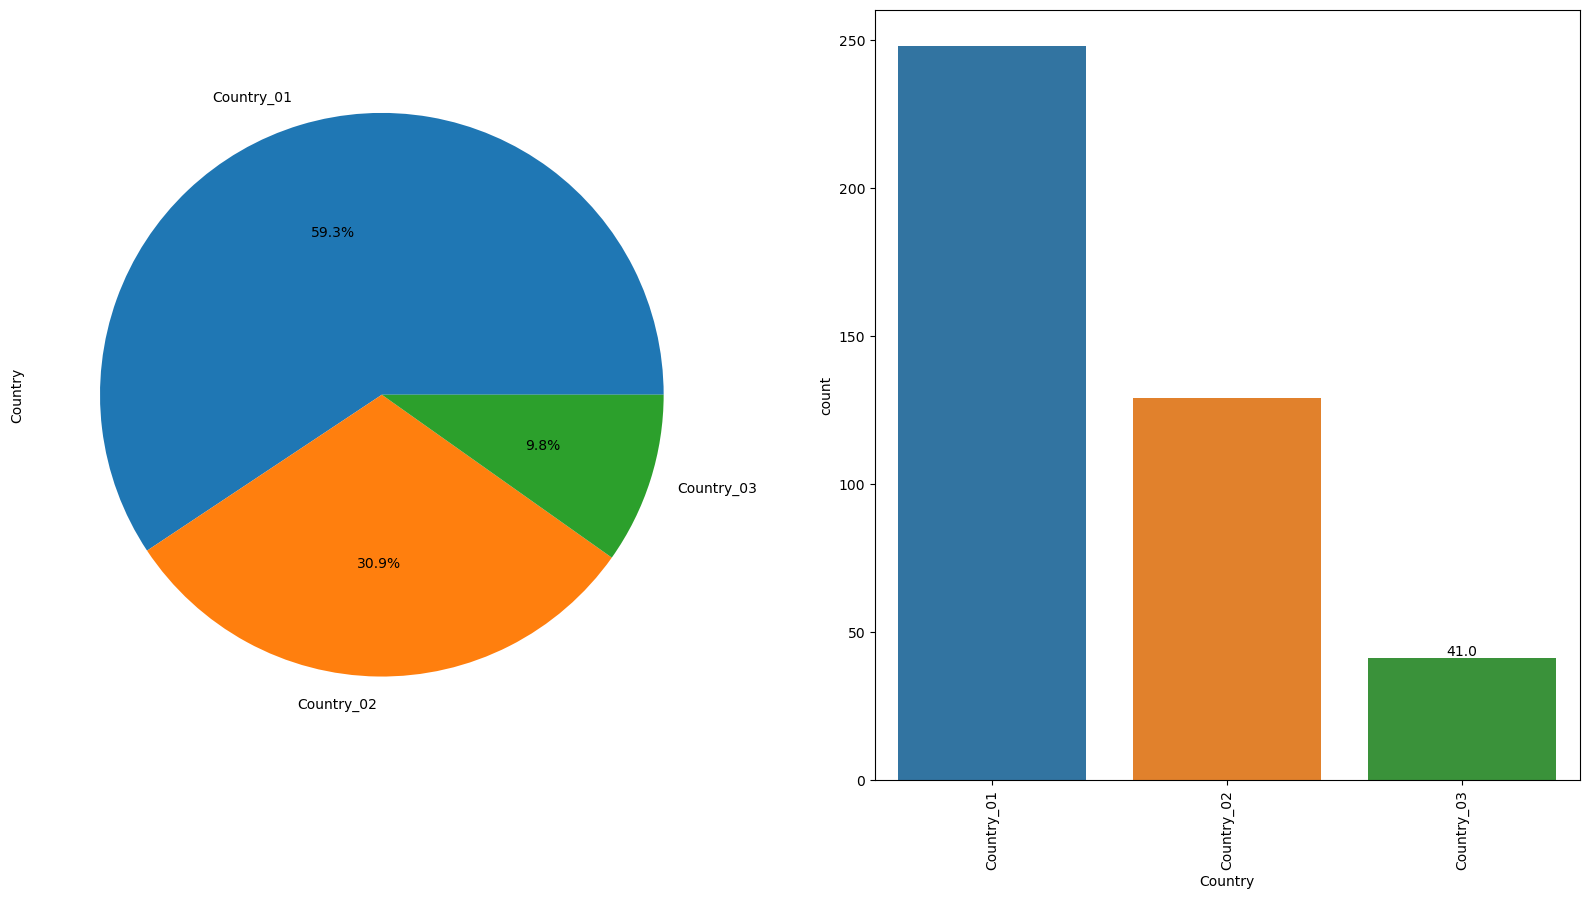

In [157]:
labeled_barplot(read_df,'Country',perc=False)


Higher percentage of accidents almost 59% has occured in country_01
Least percentage of accidents, 9.8% has occurred in country_03

In [158]:
#local

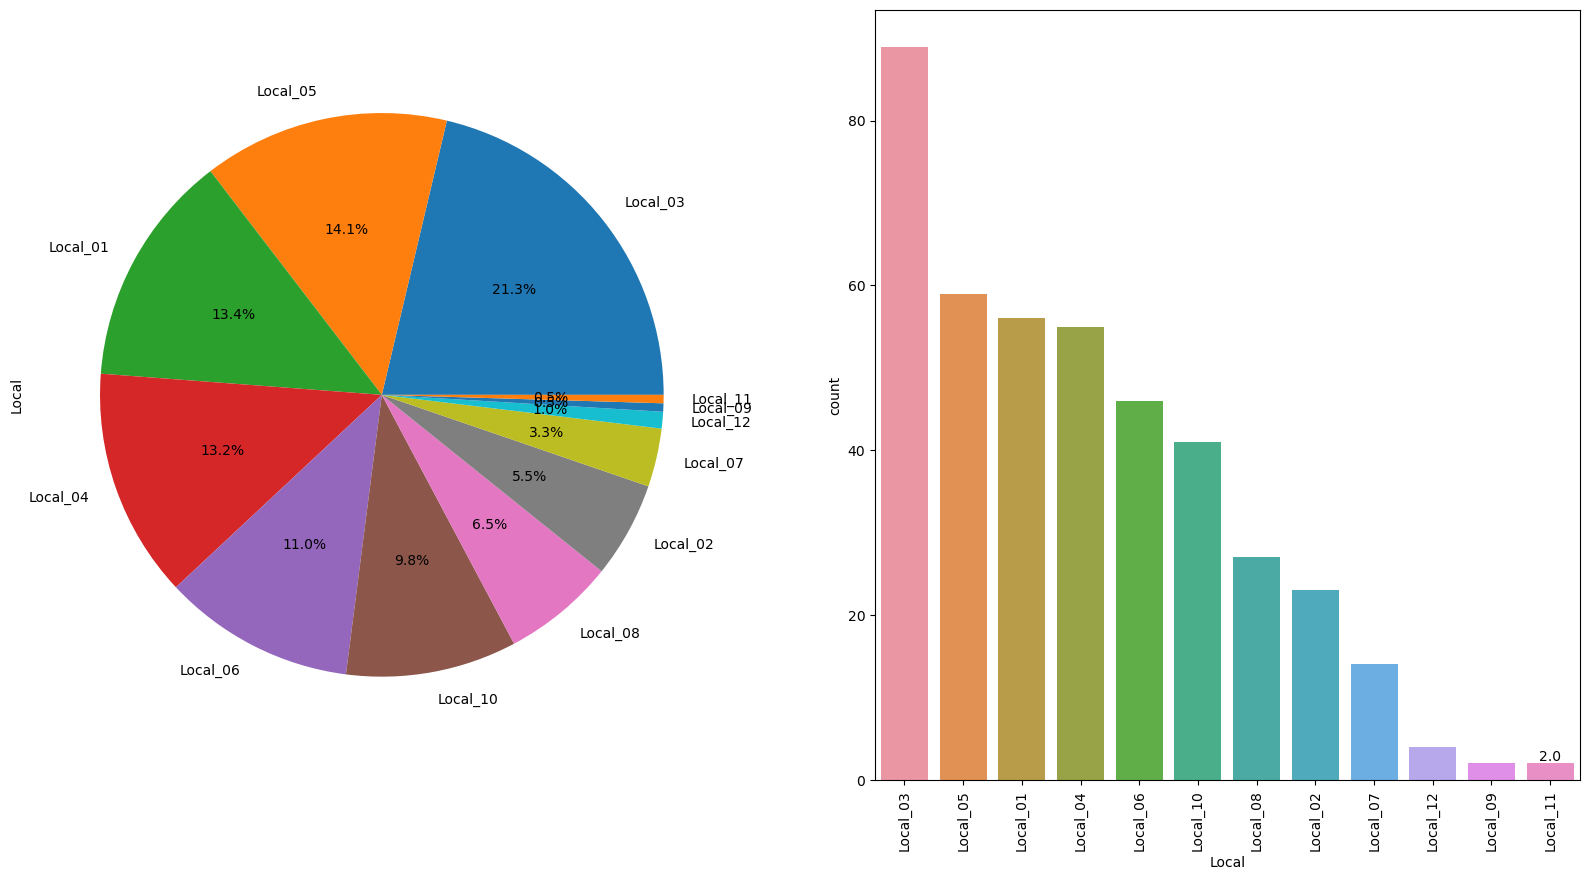

In [159]:
labeled_barplot(read_df,'Local',perc=False)


Higher pecentage of accidents has occured in Local_03
Second highest accident has occurred in Local_05

In [160]:
#industry sector

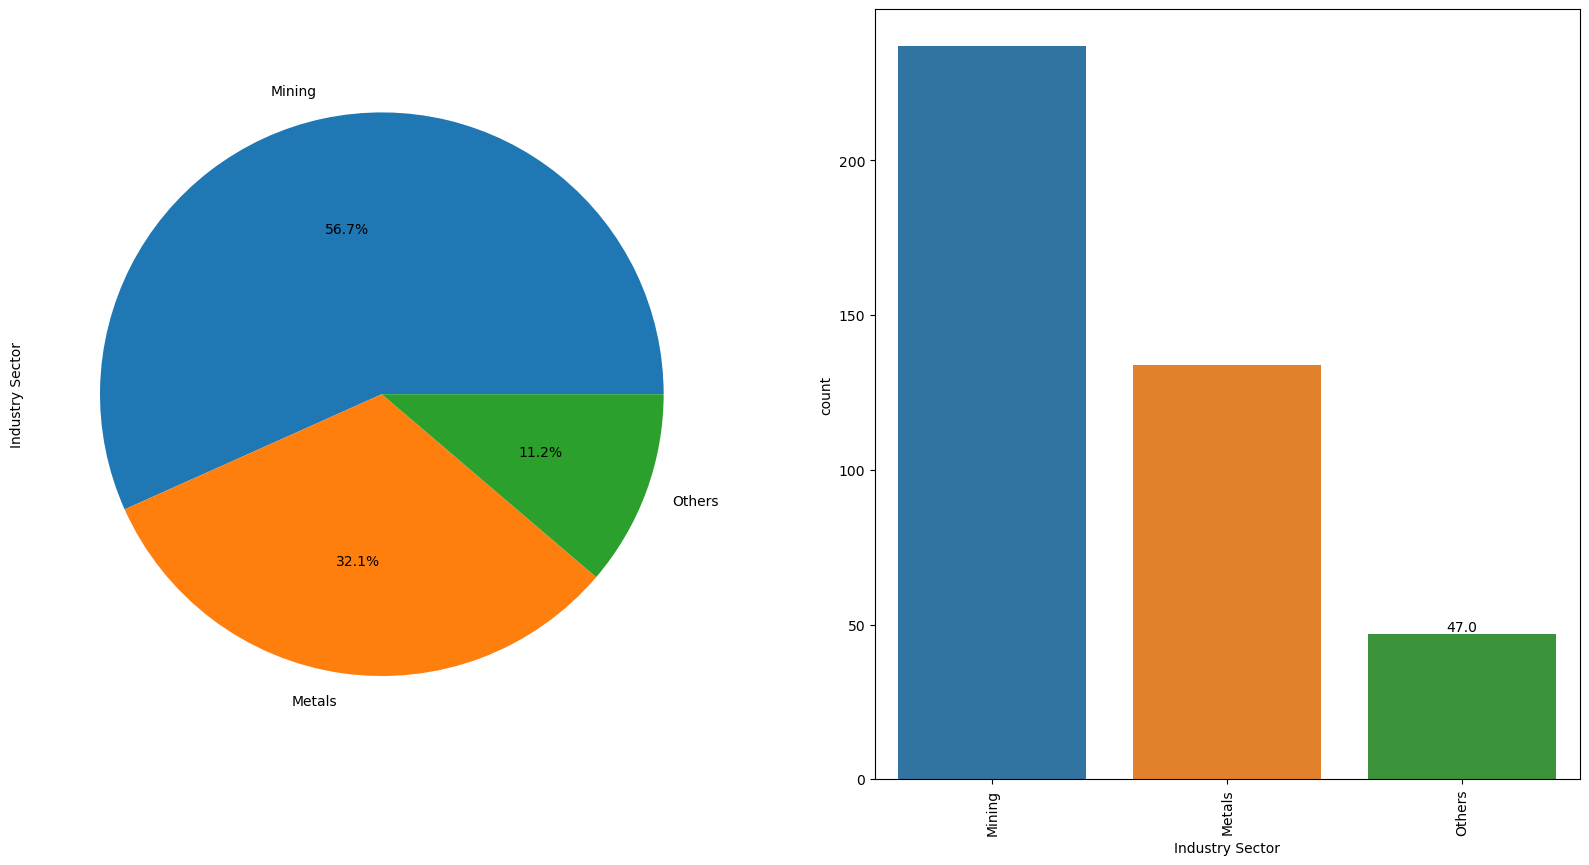

In [161]:
labeled_barplot(read_df,'Industry Sector',perc=False)


Higher percentage, ~ 56.7% of accidents has occurred in Mining industy
Second highest in Metals

In [162]:
#Gender

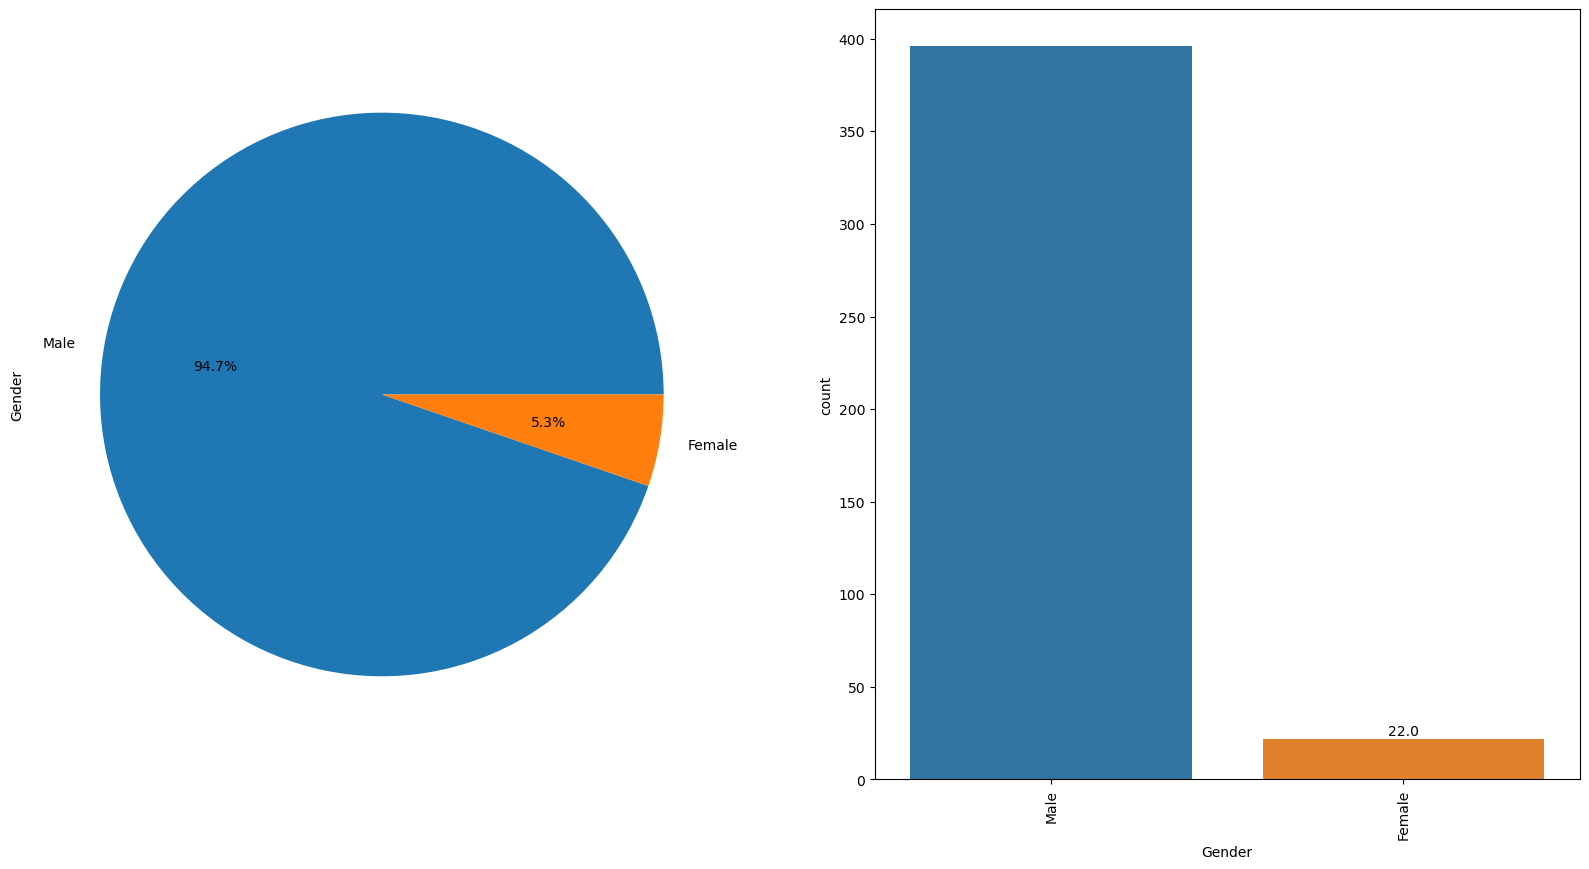

In [163]:
labeled_barplot(read_df,'Gender',perc=False)


Men have undergone higher percentage of accidents around ~94.7%
Women has less accident rate

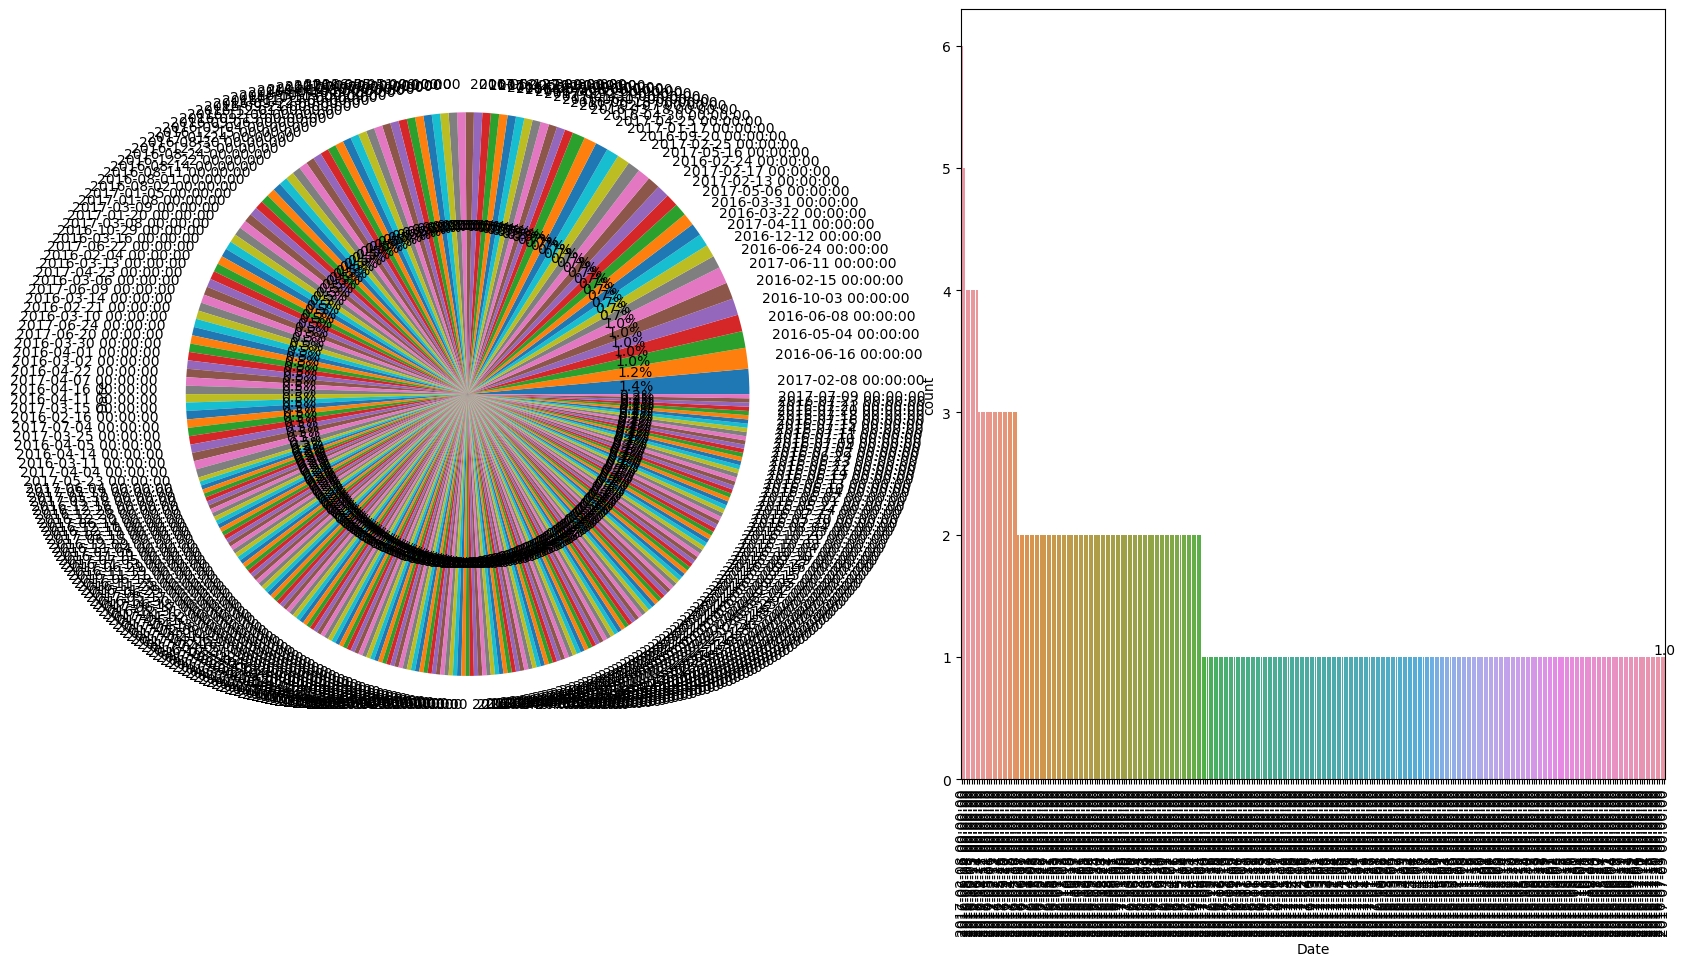

In [164]:
labeled_barplot(read_df,'Date',perc=False)



Highest percentage of accidents has occurred in 2016, ~ 68%
In 2017, less percentage of accidents has occurred

In [165]:
ds = read_df['Critical Risk'].value_counts().reset_index()
ds.columns = ['Critical Risk', 'count']
ds = ds.sort_values(['count'],ascending=False)

In [166]:
ds.head()


,Critical Risk,count
0,Others,229
1,Pressed,24
2,Manual Tools,20
3,Chemical substances,17
4,Cut,14


Text(0.5, 1.0, 'Top 20 Critical Risk reported...')

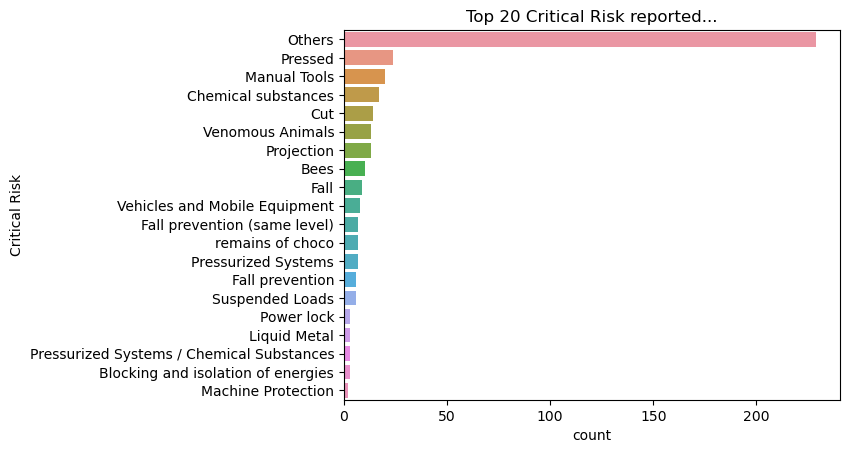

In [167]:
ds = read_df['Critical Risk'].value_counts().reset_index()
ds.columns = ['Critical Risk', 'count']
ds = ds.sort_values(['count'],ascending=False)

sns.barplot(
    x='count', 
    y='Critical Risk', 
    data = ds.head(20)
).set_title('Top 20 Critical Risk reported...')

Critical risk needs to further collected since most of the falls into other category
Pressed is the second most critical risk reported

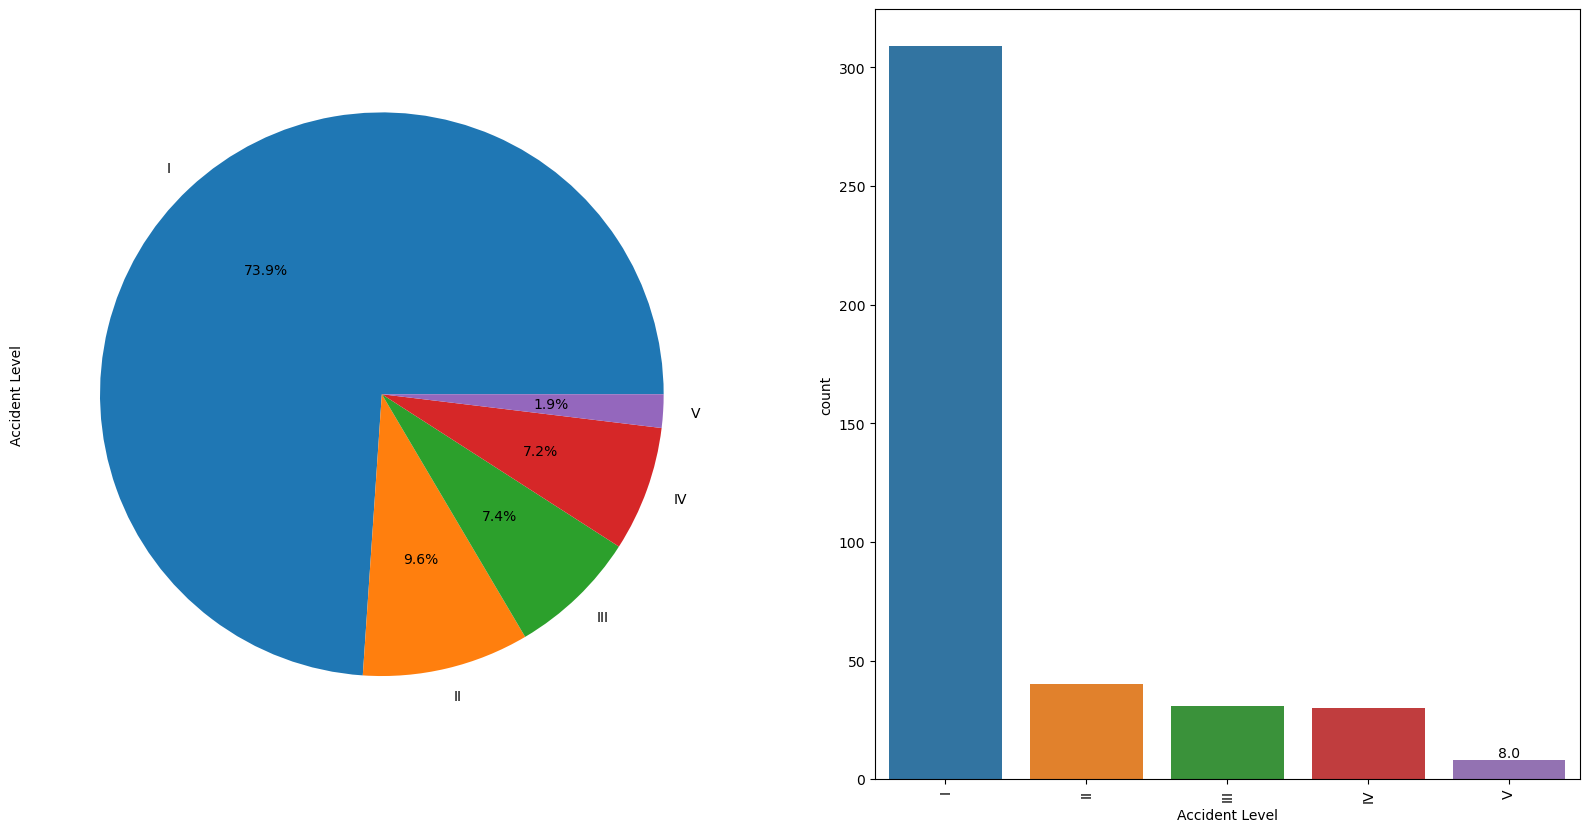

In [168]:
labeled_barplot(read_df,'Accident Level',perc=False)


8% of accidents were very severe considering level V as highest severe
Higher no of accidents happened are less severe ~ 74 %

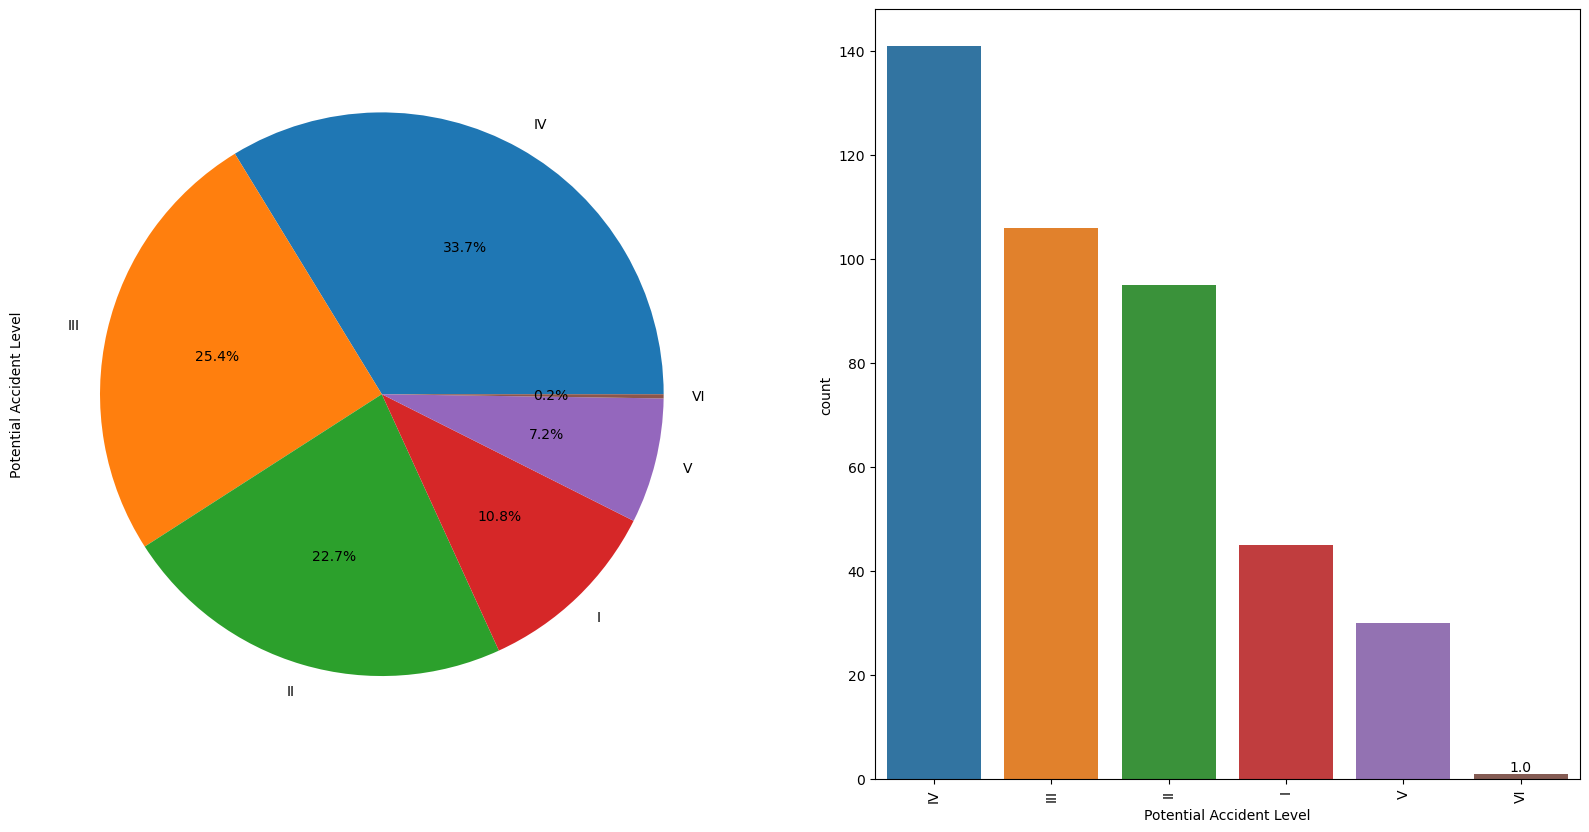

In [169]:
labeled_barplot(read_df,'Potential Accident Level',perc=False)


Most of potential accidents are of level IV

# Bivariate Analysis

In [170]:
#Defining a function
def crosstab_feature(dataframe,index,column,stack):
    Country_Local_table = pd.crosstab(index = dataframe[index], columns = dataframe[column])
    #ax =Country_Local_table.plot(kind = 'bar', figsize=(8,8))
    ax =Country_Local_table.plot(kind = 'bar', figsize=(8,5),stacked = stack)
    ax.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
    # add annotations if desired
    for c in ax.containers:
        ax.bar_label(c, label_type='center')
       # plt.title("Proportion of",column,"in different",index)
    plt.show()  # show the plot

1. Check proportion of Industry sector in different countries

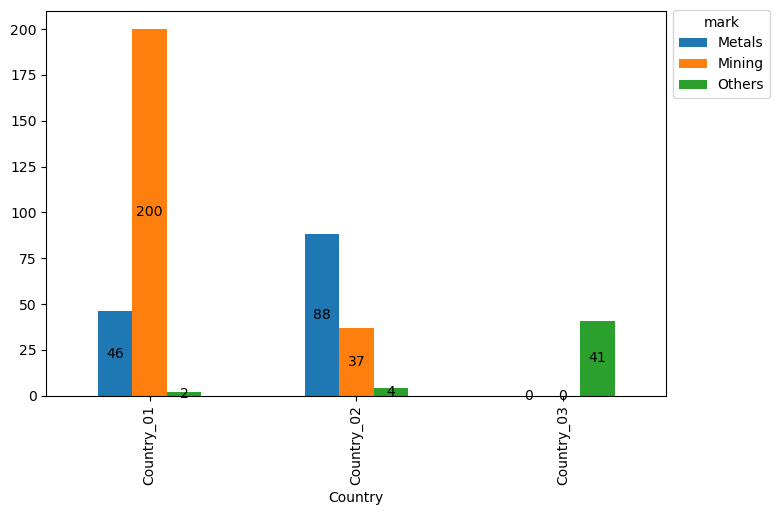

In [171]:
crosstab_feature(read_df,'Country','Industry Sector',False)

Country_01 has highest percentage of accidents occuring is Mining industy
Country_02 has highest percentage of accidents occurring in Metal industry
Country_03 has highest percentage of accidents occurring in Others industry

2. Proportion of accident level in different coutries

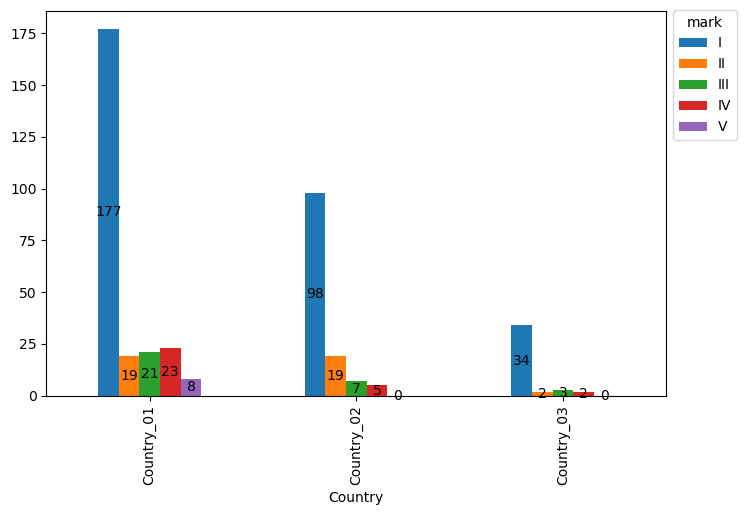

In [172]:
crosstab_feature(read_df,'Country','Accident Level',False)


High Severe accident level of 5 has occurred in Country_01
Low severe Level 1 and 2nd accident level has occurred in country_02
Country 3 has lowest accidents reported

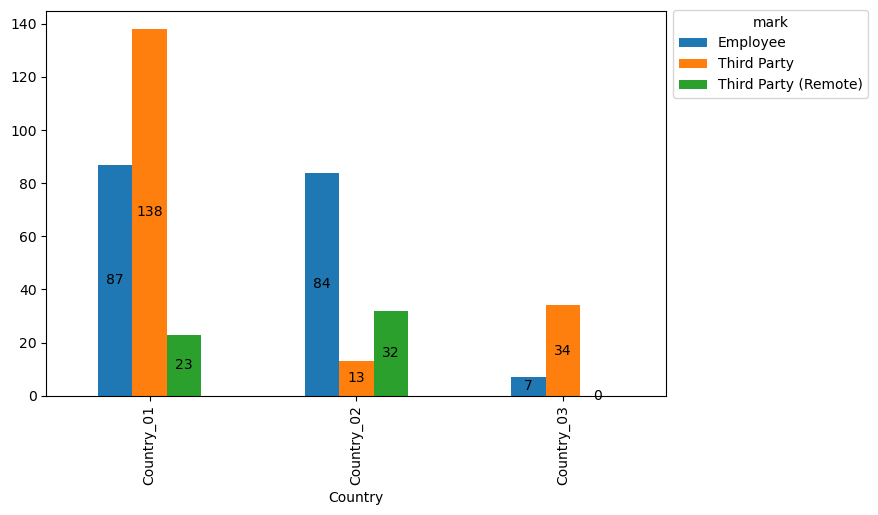

In [173]:
crosstab_feature(read_df,'Country','Employee Type',False)


Third party undergoing more accidents in Country 1 & 3
Employee under country 1 & Country 2 facing same accident rates

4. Proportion of Potential accident level in different coutries

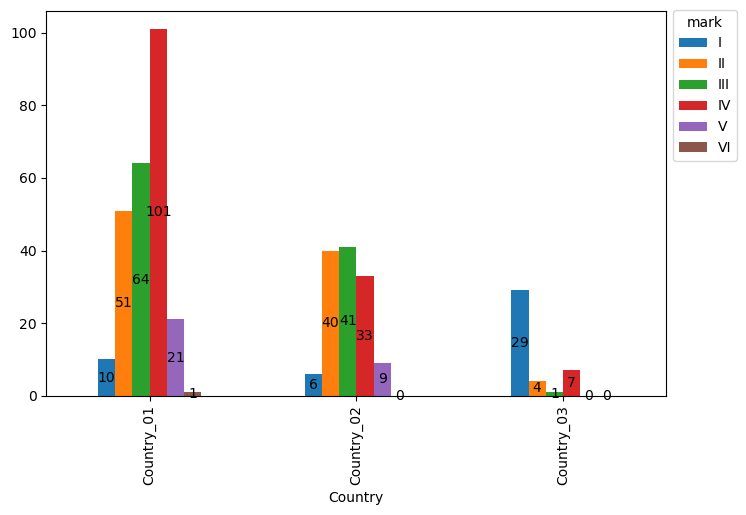

In [174]:
crosstab_feature(read_df,'Country','Potential Accident Level',False)


5. Potential Accident Level vs Employee Type distribution

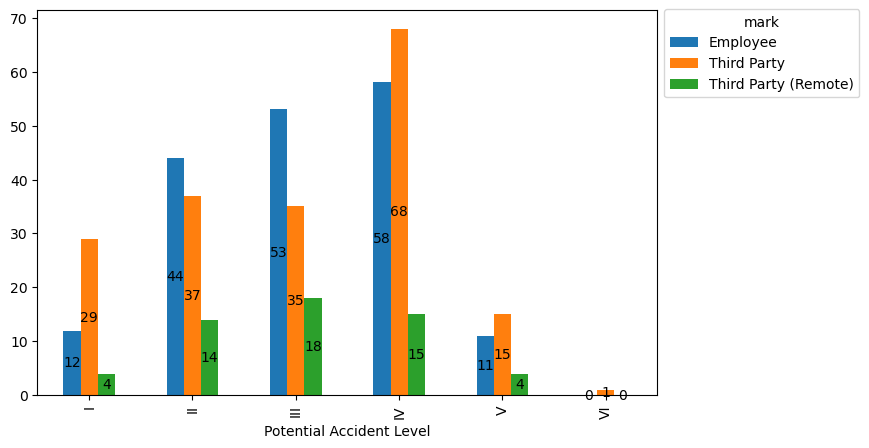

In [175]:
crosstab_feature(read_df,'Potential Accident Level','Employee Type',False)

In [176]:
#Defining a function
def crosstab_feature(dataframe,index,column,stack):
    Country_Local_table = pd.crosstab(index = dataframe[index], columns = dataframe[column])
    #ax =Country_Local_table.plot(kind = 'bar', figsize=(8,8))
    ax =Country_Local_table.plot(kind = 'bar', figsize=(8,5),stacked = stack)
    ax.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
    # add annotations if desired
    for c in ax.containers:
        ax.bar_label(c, label_type='center')
       # plt.title("Proportion of",column,"in different",index)
    plt.show()  # show the plot

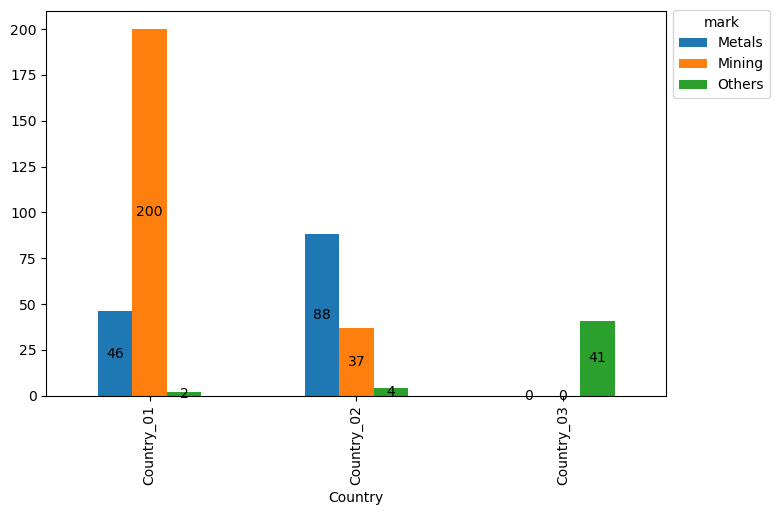

In [177]:
crosstab_feature(read_df,'Country','Industry Sector',False)


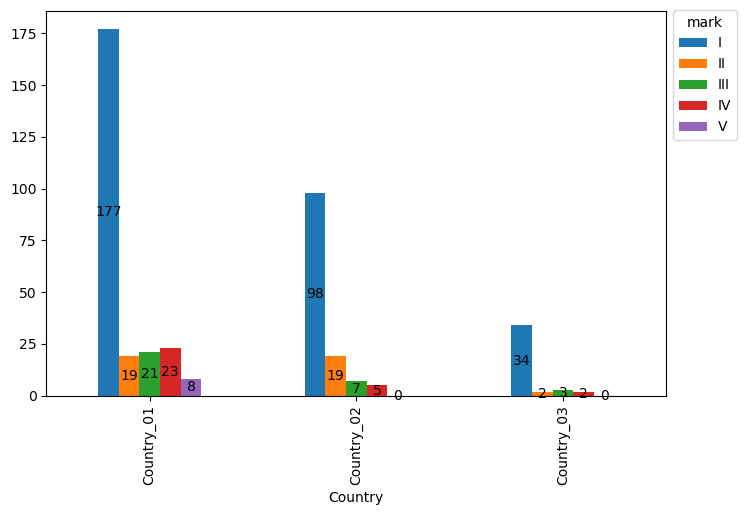

In [178]:
#proportion of accident levels in different countries
crosstab_feature(read_df,'Country','Accident Level',False)


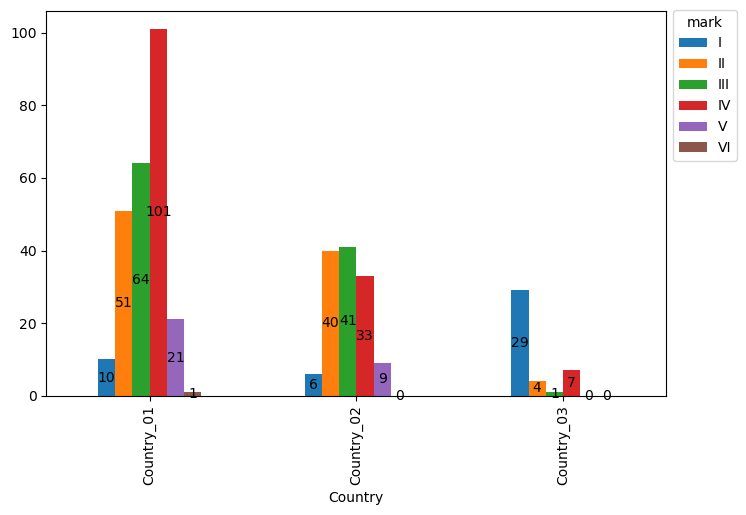

In [179]:
crosstab_feature(read_df,'Country','Potential Accident Level',False)


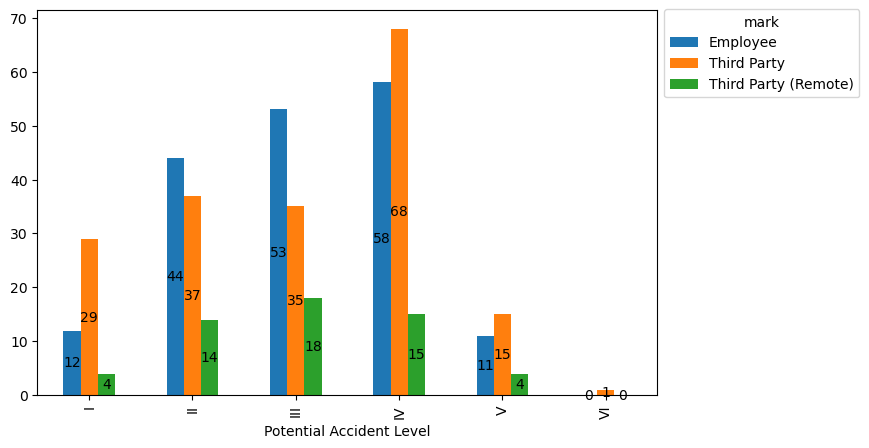

In [180]:
crosstab_feature(read_df,'Potential Accident Level','Employee Type',False)


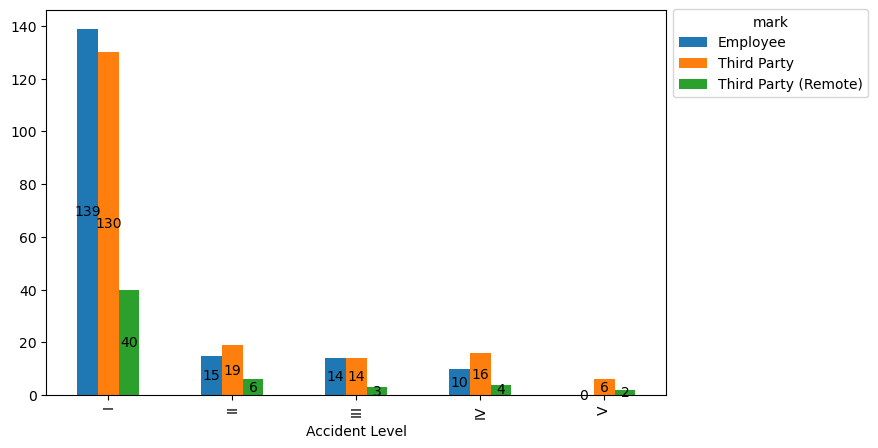

In [181]:
crosstab_feature(read_df,'Accident Level','Employee Type',False)


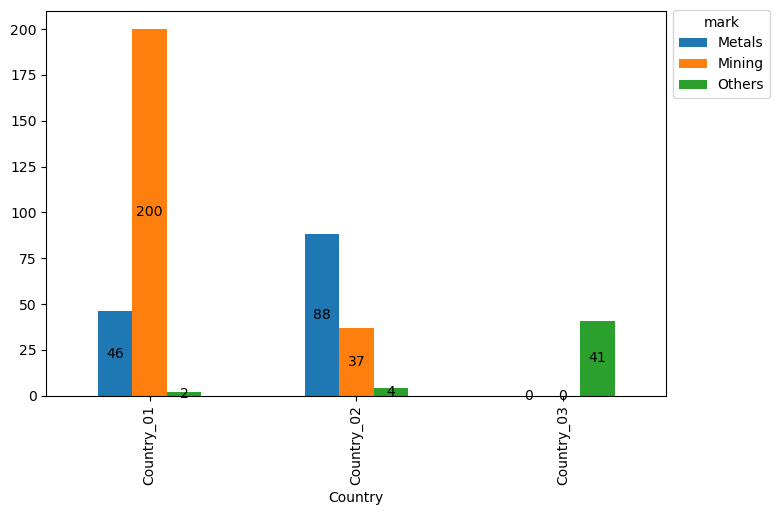

In [182]:
crosstab_feature(read_df,'Country','Industry Sector',False)

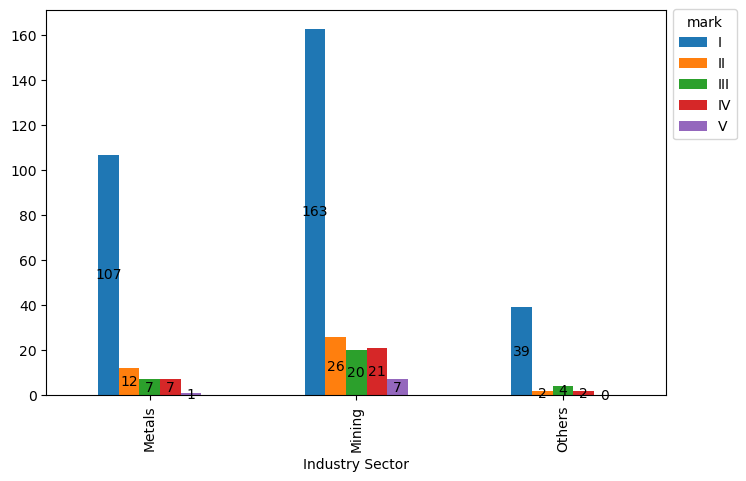

In [183]:
crosstab_feature(read_df,'Industry Sector','Accident Level',False)

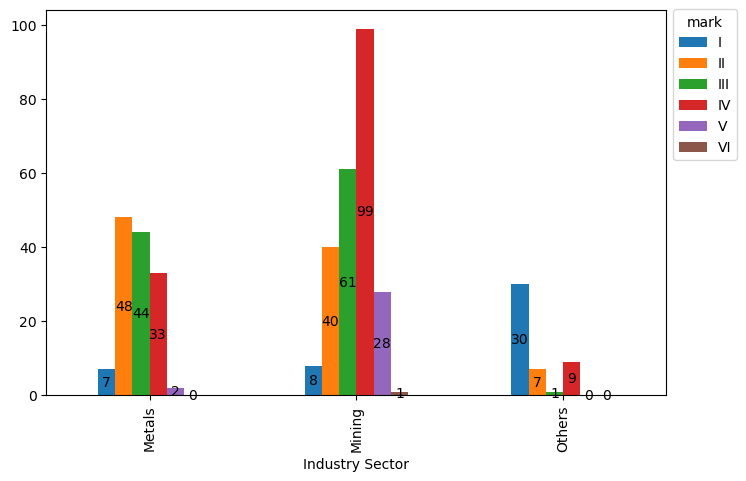

In [184]:
crosstab_feature(read_df,'Industry Sector','Potential Accident Level',False)


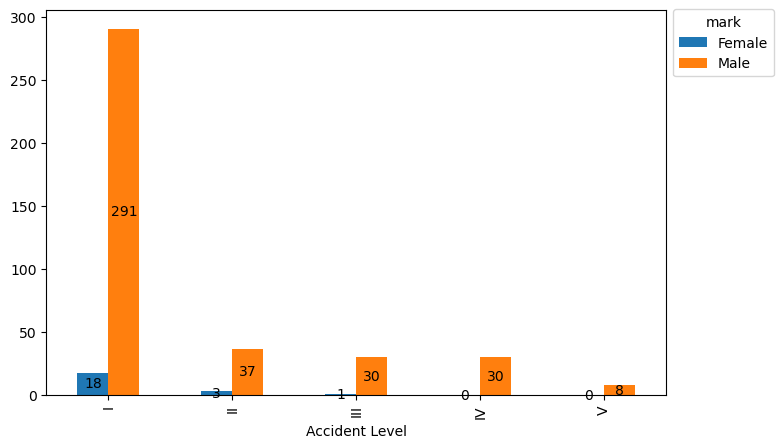

In [185]:
crosstab_feature(read_df,'Accident Level','Gender',False)


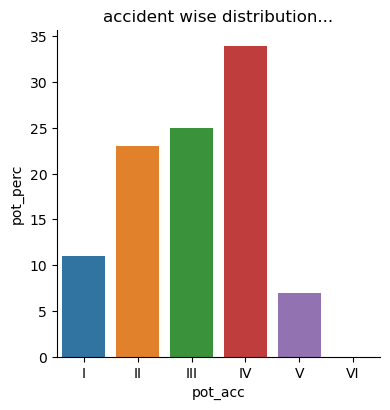

In [186]:
acc_cnt = np.round(read_df['Accident Level'].value_counts(normalize=True) * 100)
acc_cnt = pd.DataFrame({'acc':acc_cnt.index, 'perc':acc_cnt.values})
pot_acc_cnt = np.round(read_df['Potential Accident Level'].value_counts(normalize=True) * 100)
pot_acc_cnt = pd.DataFrame({'pot_acc':pot_acc_cnt.index, 'pot_perc':pot_acc_cnt.values})
acc_cnt = acc_cnt.sort_values(by=['acc'], ascending=True).reset_index(drop=True)
pot_acc = pot_acc_cnt.sort_values(by=['pot_acc'], ascending=True).reset_index(drop=True)
result = pd.concat([acc_cnt, pot_acc], axis=1, join="outer")
result.fillna(0, inplace=True)
fig = sns.catplot(
    data=result, x="pot_acc", y="pot_perc",
    kind="bar", height=4, 
).set(title='accident wise distribution...')

<Axes: xlabel='Date', ylabel='Accident Level'>

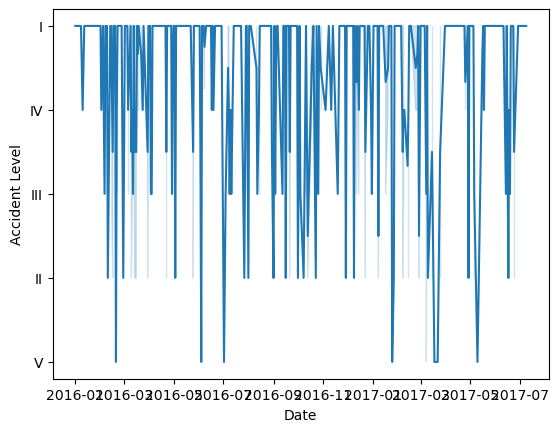

In [187]:
sns.lineplot(data=read_df, x='Date', y='Accident Level')


In [188]:
# Converting categorical columns to encoded. Before training a model, we need to convert the categorical data into numeric data

In [189]:
read_df.head(1)


,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo."


In [190]:
read_df  = read_df.copy()


# PREPROCESSING DATA

In [191]:
read_df.head(1)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo."


In [192]:
read_df['Description'][0]

'While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.'

In [207]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))

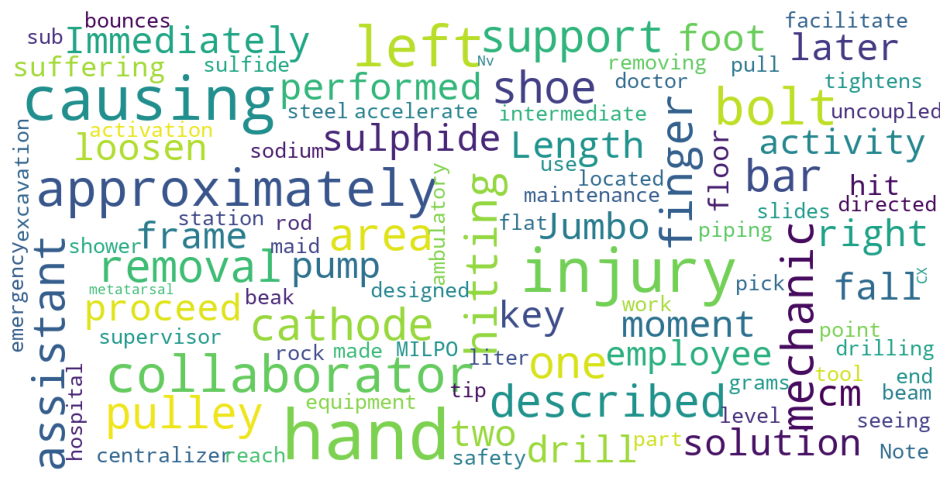

In [211]:
wordcloud = WordCloud(
        background_color='white',
        stopwords=set(stopwords),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
desc = read_df['Description']
wordcloud=wordcloud.generate(str(desc))

fig = plt.figure(1, figsize=(12, 12)) 
plt.axis('off')
 
plt.imshow(wordcloud)
plt.show()

In [225]:
read_df['Description'][0]

'While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.'

In [222]:
from wordcloud import WordCloud 

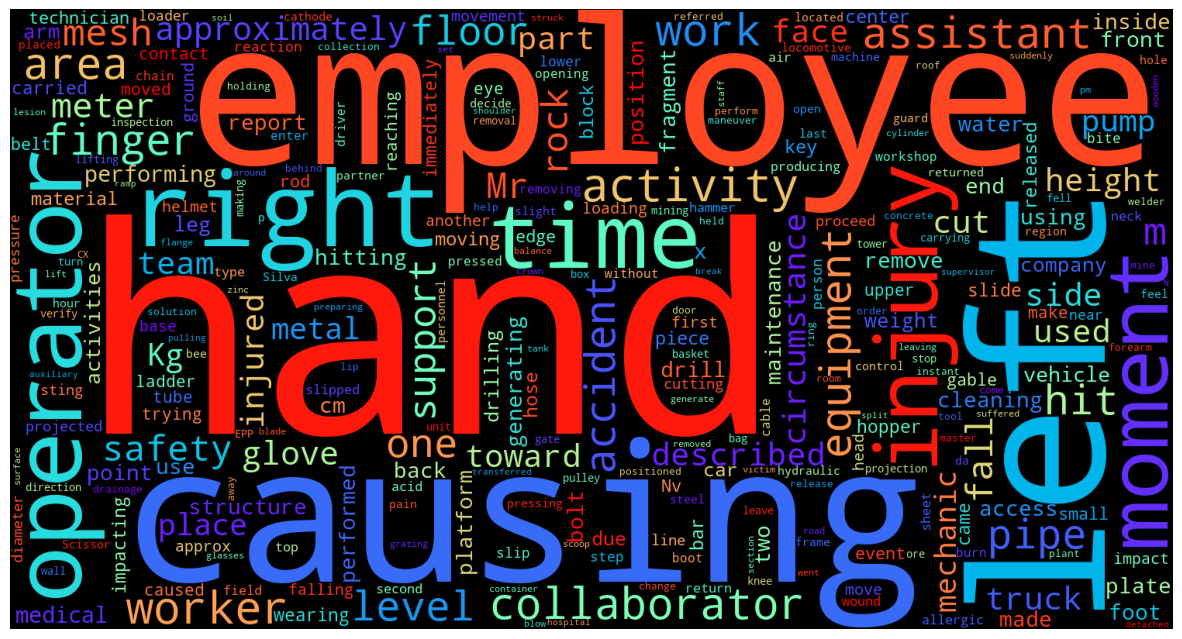

In [224]:
wordcloud = WordCloud(width = 1500, height = 800, random_state=0, background_color='black', colormap='rainbow', \
                      min_font_size=5, max_words=300, collocations=False).generate(" ".join(read_df['Description'].values))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [226]:
def remove_url(text):
  text = re.sub(r'\s*https?://\S+(\s+|$)', '', text, flags=re.MULTILINE)
  return text

read_df['Description'] = read_df['Description'].apply(lambda x: remove_url(x))

read_df["Description"].head(1)

0    While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.
Name: Description, dtype: object

In [227]:
def remove_url(text):
  text = re.sub(r'\s*@\S+(\s+)', '', text, flags=re.MULTILINE)
  return text

read_df['Description'] = read_df['Description'].apply(lambda x: remove_url(x))

read_df["Description"].head(1)

0    While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.
Name: Description, dtype: object

In [228]:
def remove_hash(text):
  text = re.sub(r'\s*#\S+(\s+)', ' ', text, flags=re.MULTILINE)
  return text

read_df['Description'] = read_df['Description'].apply(lambda x: remove_hash(x))

read_df["Description"].head(1)


0    While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.
Name: Description, dtype: object

In [229]:
read_df['Description'] = read_df.apply(lambda row: nltk.word_tokenize(row['Description']), axis=1) # Tokenization of data


In [230]:
from nltk.corpus import stopwords
stopwords=stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# set custom stop-words list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))        

In [231]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [232]:
from nltk.stem import WordNetLemmatizer

In [233]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

read_df['Description'] = read_df.apply(lambda row: normalize(row['Description']), axis=1)
read_df.head(1)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,remove drill rod jumbo 08 maintenance supervisor proceed loosen support intermediate centralizer facilitate removal see mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tighten finger mechanic drill bar beam jumbo


In [235]:
read_df.head(2)


,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,remove drill rod jumbo 08 maintenance supervisor proceed loosen support intermediate centralizer facilitate removal see mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tighten finger mechanic drill bar beam jumbo
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,activation sodium sulphide pump pip uncouple sulfide solution design area reach maid immediately make use emergency shower direct ambulatory doctor later hospital note sulphide solution 48 grams liter


In [236]:
read_df.to_csv("nlp_chatbot_cleaned_set.csv", index=False)

In [237]:
read_df = pd.read_csv('nlp_chatbot_cleaned_set.csv')

In [238]:
read_df.head(2)


,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,remove drill rod jumbo 08 maintenance supervisor proceed loosen support intermediate centralizer facilitate removal see mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tighten finger mechanic drill bar beam jumbo
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,activation sodium sulphide pump pip uncouple sulfide solution design area reach maid immediately make use emergency shower direct ambulatory doctor later hospital note sulphide solution 48 grams liter


In [239]:
 print("The number of records:", read_df.shape[0]," and number of columns:",read_df.shape[1],"after text preprocessing")


The number of records: 418  and number of columns: 10 after text preprocessing


SUMMARY 
Minimum line length: 57
Maximum line length: 628
Minimum number of words: 9
Maximum number of words: 96

In [116]:
# Design train and test basic machine learning classifiers

In [240]:
read_df_dummy_encoding = read_df.copy(deep = True)


In [241]:
read_df_dummy_encoding.head(1)


,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,remove drill rod jumbo 08 maintenance supervisor proceed loosen support intermediate centralizer facilitate removal see mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tighten finger mechanic drill bar beam jumbo


In [281]:
#Coverting the roman values of Accident Level and Potential Accident level
read_df_dummy_encoding['Accident Level'] = read_df_dummy_encoding['Accident Level'].replace({'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6})
read_df_dummy_encoding['Potential Accident Level'] = read_df_dummy_encoding['Potential Accident Level'].replace({'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6})
label = read_df_dummy_encoding['Accident Level'].astype('category')

In [283]:
Country_dummies = pd.get_dummies(read_df['Country'], columns=["Country"], drop_first=True)
Local_dummies = pd.get_dummies(read_df['Local'], columns=["Local"], drop_first=True)
Gender_dummies = pd.get_dummies(read_df['Gender'], columns=["Gender"], drop_first=True)
IS_dummies = pd.get_dummies(read_df['Industry Sector'], columns=['Industry Sector'], prefix='IS', drop_first=True)
EmpType_dummies = pd.get_dummies(read_df['Employee Type'], columns=['Employee Type'], prefix='EmpType', drop_first=True)
CR_dummies = pd.get_dummies(read_df['Critical Risk'], columns=['Critical Risk'], prefix='CR', drop_first=True)

# Merge the above dataframe with the original dataframe ind_feat_df
read_df_dummy_encoding = read_df_dummy_encoding.join(Country_dummies.add_suffix('_Country').reset_index(drop=True)).join(Local_dummies.add_suffix('_Local').reset_index(drop=True)).join(Gender_dummies.add_suffix('_Gender').reset_index(drop=True)).join(IS_dummies.add_suffix('_IS').reset_index(drop=True)).join(EmpType_dummies.add_suffix('_EmpType').reset_index(drop=True)).join(CR_dummies.add_suffix('_CR').reset_index(drop=True))
read_df.head(3)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,remove drill rod jumbo 08 maintenance supervisor proceed loosen support intermediate centralizer facilitate removal see mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tighten finger mechanic drill bar beam jumbo
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,activation sodium sulphide pump pip uncouple sulfide solution design area reach maid immediately make use emergency shower direct ambulatory doctor later hospital note sulphide solution 48 grams liter
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,substation milpo locate level 170 collaborator excavation work pick hand tool hit rock flat part beak bounce hit steel tip safety shoe metatarsal area leave foot collaborator cause injury


In [284]:
read_df_dummy_encoding.head(1)


,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description,...,CR_Projection_CR,CR_Projection of fragments_CR,CR_Projection/Burning_CR,CR_Projection/Choco_CR,CR_Projection/Manual Tools_CR,CR_Suspended Loads_CR,CR_Traffic_CR,CR_Vehicles and Mobile Equipment_CR,CR_Venomous Animals_CR,CR_remains of choco_CR
0,0,Country_01,Local_01,Mining,1,3,Male,Third Party,Pressed,remove drill rod jumbo 08 maintenance supervisor proceed loosen support intermediate centralizer facilitate removal see mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tighten finger mechanic drill bar beam jumbo,...,0,0,0,0,0,0,0,0,0,0


In [285]:
get_missing_cols(read_df_dummy_encoding, read_df_dummy_encoding.columns)


missing perc for col Date is 0.000000 %
missing perc for col Country is 0.000000 %
missing perc for col Local is 0.000000 %
missing perc for col Industry Sector is 0.000000 %
missing perc for col Accident Level is 0.000000 %
missing perc for col Potential Accident Level is 0.000000 %
missing perc for col Gender is 0.000000 %
missing perc for col Employee Type is 0.000000 %
missing perc for col Critical Risk is 0.000000 %
missing perc for col Description is 0.000000 %
missing perc for col Country_02 is 0.000000 %
missing perc for col Country_03 is 0.000000 %
missing perc for col Local_02 is 0.000000 %
missing perc for col Local_03 is 0.000000 %
missing perc for col Local_04 is 0.000000 %
missing perc for col Local_05 is 0.000000 %
missing perc for col Local_06 is 0.000000 %
missing perc for col Local_07 is 0.000000 %
missing perc for col Local_08 is 0.000000 %
missing perc for col Local_09 is 0.000000 %
missing perc for col Local_10 is 0.000000 %
missing perc for col Local_11 is 0.00000

# Tfidf


In [286]:
from sklearn.model_selection import train_test_split, cross_val_score


In [287]:
X_train, X_test, y_train, y_test = train_test_split(read_df['Description'], read_df['Accident Level'].values, test_size=0.2, random_state=42)

print('Training utterances: {}'.format(X_train.shape[0]))
print('Validation utterances: {}'.format(X_test.shape[0]))

Training utterances: 334
Validation utterances: 84


In [288]:
!pip install xgboost


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [289]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [290]:
# Defining a function which quickly test the fit of 6 different models on the dataset
def ml_models(X_train , y_train, X_test, y_test):

    # creating a dictionary with different ML models
    models = {
        'LogReg': LogisticRegression(), 
        'Naive Bayes': GaussianNB(),        
        'KNN': KNeighborsClassifier(),
        'SVM': SVC(), 
        'Decision Tree': DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=100,min_samples_leaf=5),          
        'RandomForest': RandomForestClassifier(n_estimators=100, max_depth=7),
        'Bagging': BaggingClassifier(n_estimators=50, max_samples=.7),
        'AdaBoost': AdaBoostClassifier(n_estimators= 50),
        'Gradient Boost': GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05),
        'XGBoost': XGBClassifier()
    }
    
    names = []
    scores = []

    for name, model in models.items(): # Looping through each and every model
        clf = model.fit(X_train, y_train) # Fit the models one by one
        result = clf.score(X_test,y_test) 

        names.append(name)
        scores.append(result) # Appending the test scores to the list

        result_df =  pd.DataFrame({'model': names, 'accuracy': scores}) # Creating the dataframe using the model scores
      
    return result_df # Returns the dataframe

In [291]:
# Initializing TfidfVectorizer object
tfIdfVectorizer = TfidfVectorizer()
X_train_tf = tfIdfVectorizer.fit_transform(X_train)
X_test_tf = tfIdfVectorizer.transform(X_test)

In [295]:

ml_models(X_train_tf.toarray(), y_train, X_test_tf.toarray(), y_test)


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got ['I' 'II' 'III' 'IV' 'V']